We are now ready to raise our level of abstraction another notch. We will build on the logic structures that we studied in Chapter 3, both decision elements and storage elements, to construct the basic computer model first proposed by John von Neumann in 1946. 

## 4.1 Basic Components 
To get a task done by a computer, we need two things: 
1. a computer program that specifies what the computer must to do to complete the task
2. the computer itself that is to carry out the task

A computer program consists of a set of instructions, each specifying a welldefined piece of work for the computer to carry out. 
- The instruction is the smallest piece of work specified in a computer program. That is, the computer either carries out the work specified by an instruction or it does not. 
- The computer does not have the luxury of carrying out a piece of an instruction.

**The von Neumann model consists of five parts: memory; a processing unit, input, output, and a control unit**
- The computer program is contained in the computer's memory.
- The control of the order in which the instructions are carried out is performed by the control unit.

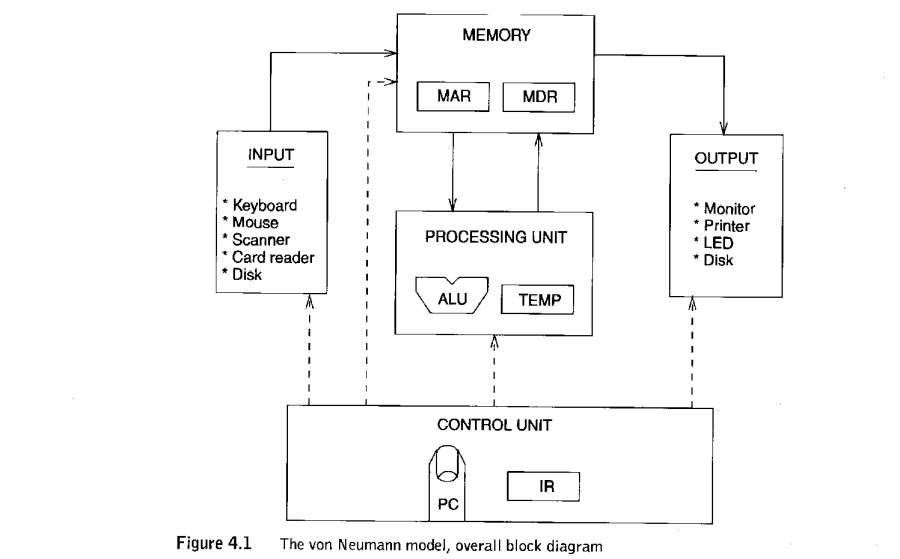

### 4.1.1 Memory 
Recall that in Chapter 3 we examined a simple 2^2-by-3-bit memory that was constructed out of gates and latches. 

A more realistic memory for one of today's computer systems is 2^28 by 8 bits.

That is, **a typical memory in today's world of computers consists of 2^28 distinct memory locations, each of which is capable of storing 8 bits of information**.
- address space of 2^28 uniquely identifiable locations
- addressability of 8 bits
- a 256-megabyte memory (256MB)

The **"256 mega"** refers to the 2^28 locations, and the **"byte"** refers to the 8 bits stored in each location.

We note (as we will note again and again) that with k bits, we can represent uniquely 2^k items.
- Thus, to uniquely identify 228 memory locations, each location must have its own 28-bit address.

In Chapter 5, we will begin the complete definition of the instruction set architecture (ISA) of the LC-3 computer. We will see that the memory address space of the LC-3 is 216 , and the addressability is 16 bits.

Recall from Chapter 3 that we access memory by providing the address from which we wish to read, or to which we wish to write.

**To read the contents of a memory location, we first place the address of that location in the memory's address register (MAR), and then interrogate the computer's memory**

**The info stored in the location having that address will be placed in the memory's data register (MDR)**.

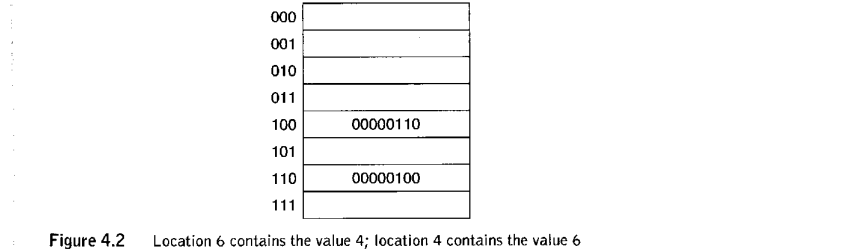

two characteristics of a memory location: its address and what is stored there. **Figure 4.2** shows a representation of a memory consisting of eight locations. Its addresses are shown at the left, numbered in binary from 0 to 7. Each location contains 8 bits of information.

The value stored in that location can be changed, but the location's memory address remains unchanged.

**To write (or store) a value in a memory location, we first write the address of the memory location in the MAR, and the value to be stored in the MDR**.
- We then interrogate the computer's memory with the Write Enable signal asserted. The information contained in the MDR will be written into the memory location whose address is in the MAR.



### 4.1.2 Processing Unit 
The actual processing of information in the computer is carried out by the processing unit. 

The processing unit in a modern computer can consist of many sophisticated complex functional units, each performing one particular operation (divide, square root, etc.). 

The simplest processing unit, and the one normally thought of when discussing the basic von Neumann model, is the **ALU**. 

**ALU** is the abbreviation for Arithmetic and Logic Unit, so called because it is usually capable of performing **basic arithmetic functions** (like ADD and SUBTRACT) and **basic logic operations** (like bit-wise AND, OR, and NOT)
- the LC-3 has an ALU, which can perform ADD, AND, and NOT operations.

The size of the quantities normally processed by the ALU is often referred to as the **word length** of the computer, and each element is referred to as a **word**

In the LC-3, the ALU processes 16-bit quantities. We say the LC-3 has a word length of 16 bits

**Each ISA has its own word length, depending on the intended use of the computer**
- Most microprocessors today that are used in PCs or workstations have a word length of either **32 bits** (as is the case with Intel's Pentium IV) or **64 bits** (as is the case with Sun's SPARC-V9 processors and Intel's Itanium processor).
- For some applications, like the microprocessors used in pagers, VCRs, and cellular telephones, 8 bits are usually enough. Such microprocessors, we say, have a word length of 8 bits.

It is almost always the case that a computer provides some small amount of storage very close to the ALU to allow results to be temporarily stored if they will be needed to produce additional results in the near future. For example, if a computer is to calculate (A + B) • C, it could store the result of A + B in memory, and then subsequently read it in order to multiply that result by C.
- However, the time it takes to access memory is long compared to the time it takes to perform the ADD or MULTIPLY.

**The most common form of temporary storage is a set of registers**
- Typically, the size of each register is identical to the size of values processed by the ALU, that is, they each contain one word.


### 4.1.3 Input and Output 
In order for a computer to process information, the information must get into the computer. In order to use the results of that processing, those results must be displayed in some fashion outside the computer. 
- peripherals

### 4.1.4 Control Unit 
**The control unit is like the conductor of an orchestra; it is in charge of making all the other parts play together.**
- it is the control unit that keeps track of both where we are within the process of executing the program and where we are in the process of executing each instruction.
- To keep track of which instruction is being executed, the control unit has an **instruction register** to contain that instruction
- To keep track of which instruction is to be processed next, the control unit has a register that contains the next instruction's address.
- For historical reasons, that **register** is called the **program counter** (abbreviated **PC**), although a better name for it would be the **instruction pointer**, since the contents of this register are, in some sense, "pointing" to the next instruction to be processed.
    - Curiously, Intel does in fact call that register the instruction pointer, but the simple elegance of that name has not caught on. 

## 4.2 The LC-3: An Example von Neumann Machine 
- **MEMORY** - consists of the storage elements, along with the MAR for addressing individual locations and the MDR for holding the contents of a memory location on its way to/from the storage.
- **INPUT/OUTPUT** - consists of a keyboard and a monitor.
    - The simplest keyboard requires two registers, a data register (KBDR) for holding the ASCII codes of keys struck, and a status register (KBSR) for maintaining status information about the keys struck
    - The simplest monitor also requires two registers, one (DDR) for holding the ASCII code of something to be displayed on the screen, and one (DSR) for maintaining associated status information
- **THE PROCESSING UNIT** - consists of a functional unit that can perform arithmetic and logic operations (ALU) and eight registers (R0,... R7) for storing temporary values that will be needed in the near future as operands for subsequent instructions.
    - The LC-3 ALU can perform one arithmetic operation (addition) and two logical operations (bitwise AND and bitwise complement).
- **THE CONTROL UNIT** - consists of all the structures needed to manage the processing that is carried out by the computer.
    - Its most important structure is the finite state machine, which directs all the activity.
    - Processing is carried out step by step, or rather, clock cycle by clock cycle.

## 4.3 Instruction Processing 
The central idea in the von Neumann model of computer processing is that the program and data are both stored as sequences of bits in the computer's memory, and the program is executed one instruction at a time under the direction of the control unit.

### 4.3.1 The Instruction 
The most basic unit of computer processing is the instruction. 

**It is made up of two parts:**
1. the **opcode** (what the instruction does)
2. the **operands** (who it is to do it to)

In Chapter 5, we will see that each LC-3 instruction consists of 16 bits (one word), numbered from left to right, bit [15] to bit [0]. Bits [15:12] contain the opcode.

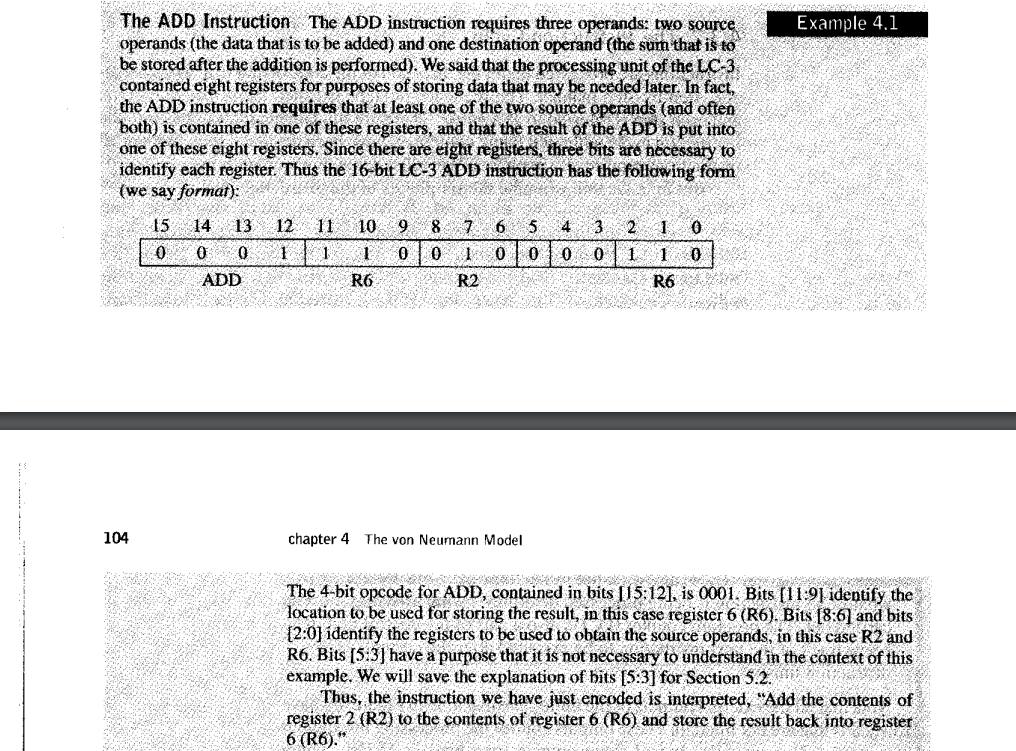

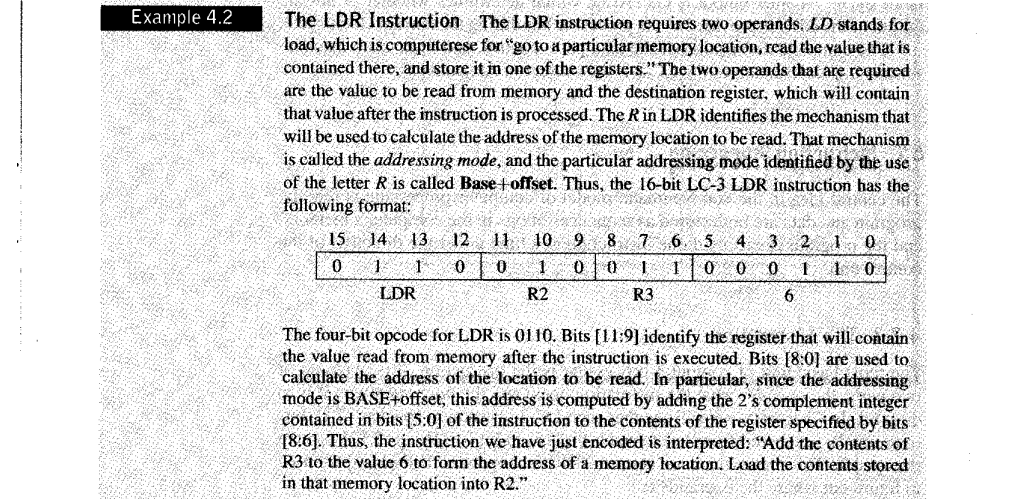

### 4.3.2 The Instruction Cycle 
Instructions are processed under the direction of the control unit in a very systematic, step-by-step manner. 

The sequence of steps is called the  instruction cycle, and each step is referred to as a phase. 

There are fundamentally six phases to the instruction cycle, although many computers have been designed such that not all instructions require all six phases.

**6 phases:**
1. FETCH
2. DECODE
3. EVALUATE ADDRESS
4. FETCH OPERANDS
5. EXECUTE
6. STORE RESULT 

#### FETCH 
- obtains the next instruction from memory and loads it into the instruction register (IR) of the control unit.
-  In order to carry out the work of the next instruction, we must first identify where it is. The program counter (PC) contains the address of the next instruction.

**Thus, the FETCH phase takes multiple steps:**
1. First the MAR is loaded with the contents of the PC.
2. Next, the memory is interrogated, which results in the next instruction being placed by the memory into the MDR.
3. Finally, the IR is loaded with the contents of the MDR.

**The complete description of the FETCH phase is as follows:**
1. **Step 1:** Load the MAR with the contents of the PC, and simultaneously increment the PC.
2. **Step 2:** Interrogate memory, resulting in the instruction being placed in the MDR.
3. **Step 3:** Load the IR with the contents of the MDR. 

Step 1 takes one machine cycle. Step 2 could take one machine cycle, or many machine cycles, depending on how long it takes to access the computer's memory. Step 3 takes one machine cycle. In a modern digital computer, a machine cycle takes a very small fraction of a second. Indeed, a 3.3-GHz Intel Pentium IV completes 3.3. billion machine cycles (or clock cycles) in one second. Said another way, one machine cycle (or clock cycle) takes 0.303 billionths of a second (0.303 nanoseconds).

Recall that the light bulb that is helping you read this text is switching on and off at the rate of 60 times a second. Thus, in the time it takes a light bulb to switch on and off once, today's computers can complete 55 million machine cycles!

#### DECODE
examines the instruction in order to figure out what the microarchitecture is being asked to do.
- In the LC-3, a 4-to-16 decoder identifies which of the 16 opcodes is to be processed. Input is the four-bit opcode IR[15:12].
- The output line asserted is the one corresponding to the opcode at the input.
- Depending on which output of the decoder is asserted, the remaining 12 bits identify what else is needed to process that instruction.

#### EVALUATE ADDRESS 
computes the address of the memory location that is needed to process the instruction.

#### FETCH OPERANDS
obtains the source operands needed to process the instruction.

In the LDR example, this phase took two steps: 
- loading MAR with the address calculated in the EVALUATE ADDRESS phase
- reading memory, which resulted in the source operand being placed in MDR

#### EXECUTE
carries out the execution of the instruction.

#### STORE RESULT
The final phase of an instruction's execution. 

The result is written to its designated destination.


Once the sixth phase (STORE RESULT) has been completed, the control unit begins anew the instruction cycle, starting from the top with the FETCH phase.

Since the PC was updated during the previous instruction cycle, it contains at this point the address of the instruction stored in the next sequential memory location



## 4.4 Changing The Sequence of Execufion 
We have identified two types of instructions, the **ADD**, which is an example of an **operate instruction** in that it processes data, and the **LDR**, which is an example of a **data movement instruction** in that it moves data from one place to another.

There is a third type of instruction, the **control instruction**, whose purpose is to change the sequence of instruction execution.

As we know, each instruction cycle starts with loading the MAR with the PC. Thus, if we wish to change the sequence of instructions executed, we must change the PC between the time it is incremented (during the FETCH phase of one instruction) and the start of the FETCH phase of the next.

Control instructions perform that function by loading the PC during the EXECUTE phase, which wipes out the incremented PC that was loaded during the FETCH phase.

The **result** is that, at the start of the next instruction cycle, when the computer accesses the PC to obtain the address of an instruction to fetch, it will get the address loaded during the previous EXECUTE phase, rather than the next sequential instruction in the computer's program. 

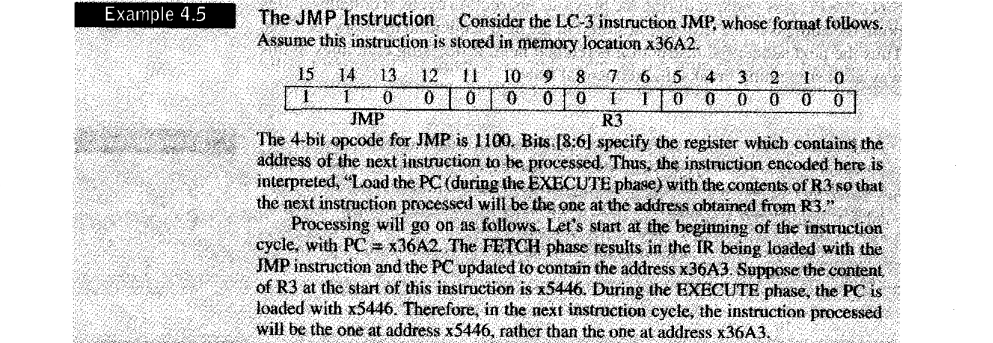

### 4.4.1 Control of the Instruction Cycle 
each step of every operation in the computer is controlled by the finite state machine in the control unit

Figure 4.4 shows a very abbreviated part of the state diagram corresponding to the finite state machine that directs all phases of the instruction cycle.

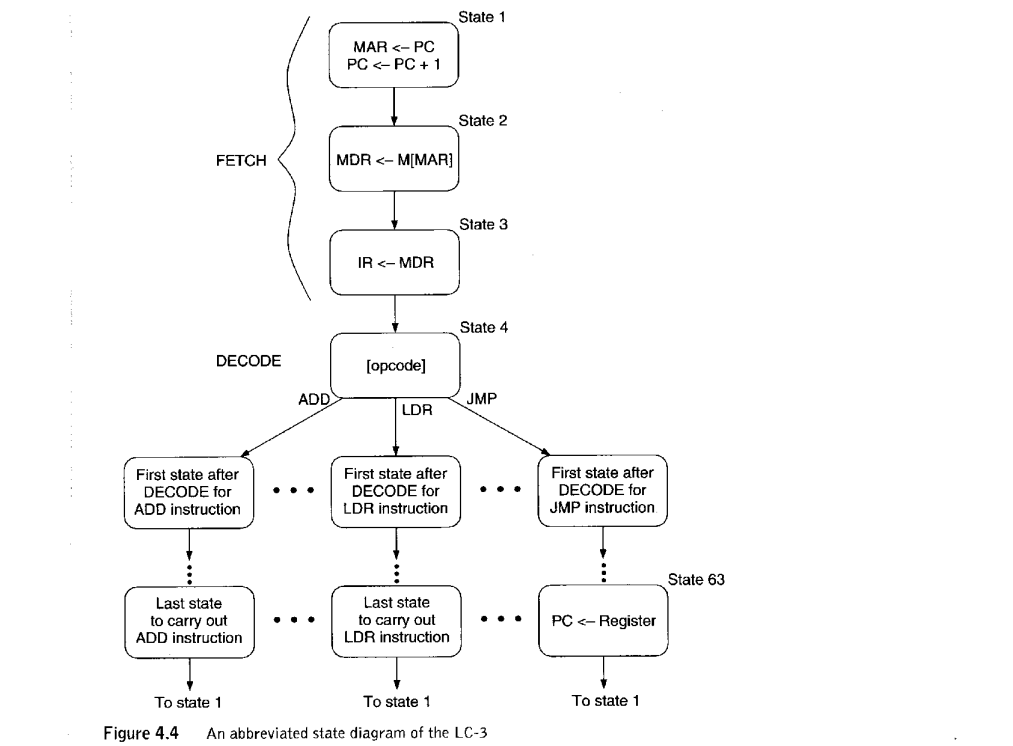

As is the case with the finite state machines studied in Section 3.6, each state corresponds to one clock cycle of activity.

- Latches are loaded at the end of the clock cycle if the corresponding control signal is asserted.

The DECODE phase takes one cycle. In state 4, using the external input IR, and in particular the opcode bits of the instruction, the finite state machine can go to the appropriate next state for processing instructions depending on the particular opcode in IR[15:12].
- Processing continues cycle by cycle until the instruction completes execution, and the next state logic returns the finite state machine to state 1. 

As we mentioned earlier in this section, it is sometimes necessary not to execute the next sequential instruction but rather to jump to another location to find the next instruction to execute. As we have said, instructions that change the flow of instruction processing in this way are called **control instructions**.
- This can be done very easily by loading the PC during the EXECUTE phase of the control instruction, as in state 63 of Figure 4.4, for example.

there is nothing magic about the processing of the instruction cycle - a properly completed state diagram would be able to control, clock cycle by clock cycle, all the steps required to execute all the phases of every instruction cycle. 
- Since each instruction cycle ends by returning to state 1, the finite state machine can process, cycle by cycle, a complete computet program. 

## 4.5 Stopping the Computer 
Usually, user programs execute under the control of an operating system. 

Operating systems are just computer programs themselves. So as far as the computer is concerned, the instruction cycle continues whether a user program is being processed or the operating system is being processed. 

This is fine as far as user programs are concerned since each user program terminates with a control instruction that changes the PC to again start processing the operating system - often to initiate the execution of another user program.

**But what if we actually want to stop this potentially infinite sequence of instruction cycles?**
- the clock defines the machine cycle.
- It enables the finite state machine to continue on to the next machine cycle, whether that machine cycle is the next step of the current phase or the first step of the next phase of the instruction cycle.
- Stopping the instruction cycle requires stopping the clock.

Figure 4.5a shows a block diagram of the **clock circuit**, consisting primarily of a **clock generator** and a **RUN latch**. 
- The clock generator is a crystal oscillator, a piezoelectric device that you may have studied in your physics or chemistry class.
- For our purposes, the crystal oscillator is a black box that produces the oscillating voltage shown in Figure 4.5b.
- Every machine cycle, the voltage rises to 2.9 volts and then drops back to 0 volts.
- If the **RUN latch** is in the `1` state (i.e., Q — 1), the output of the clock circuit is the same as the output of the clock generator.
- If the **RUN latch** is in the `0` state (i.e., Q = 0), the output of the clock circuit is 0.

Thus, stopping the instruction cycle requires only clearing the RUN latch. 
- Every computer has some mechanism for doing that. In some older machines, it is done by executing a HALT instruction.

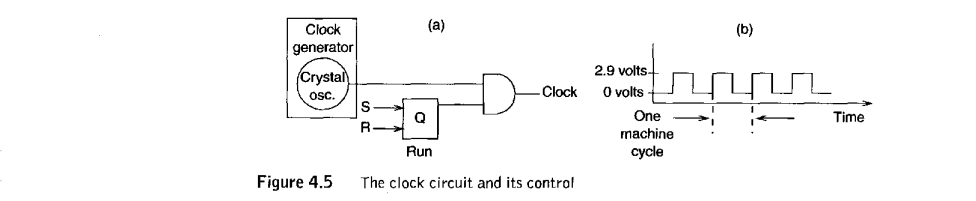

